<a href="https://colab.research.google.com/github/AisIzmailova/AisIzmailova_Practice_Notebooks/blob/master/DL_Transfer_Learning_with_Tensorflow_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning

##Part 2: Fine-tuning

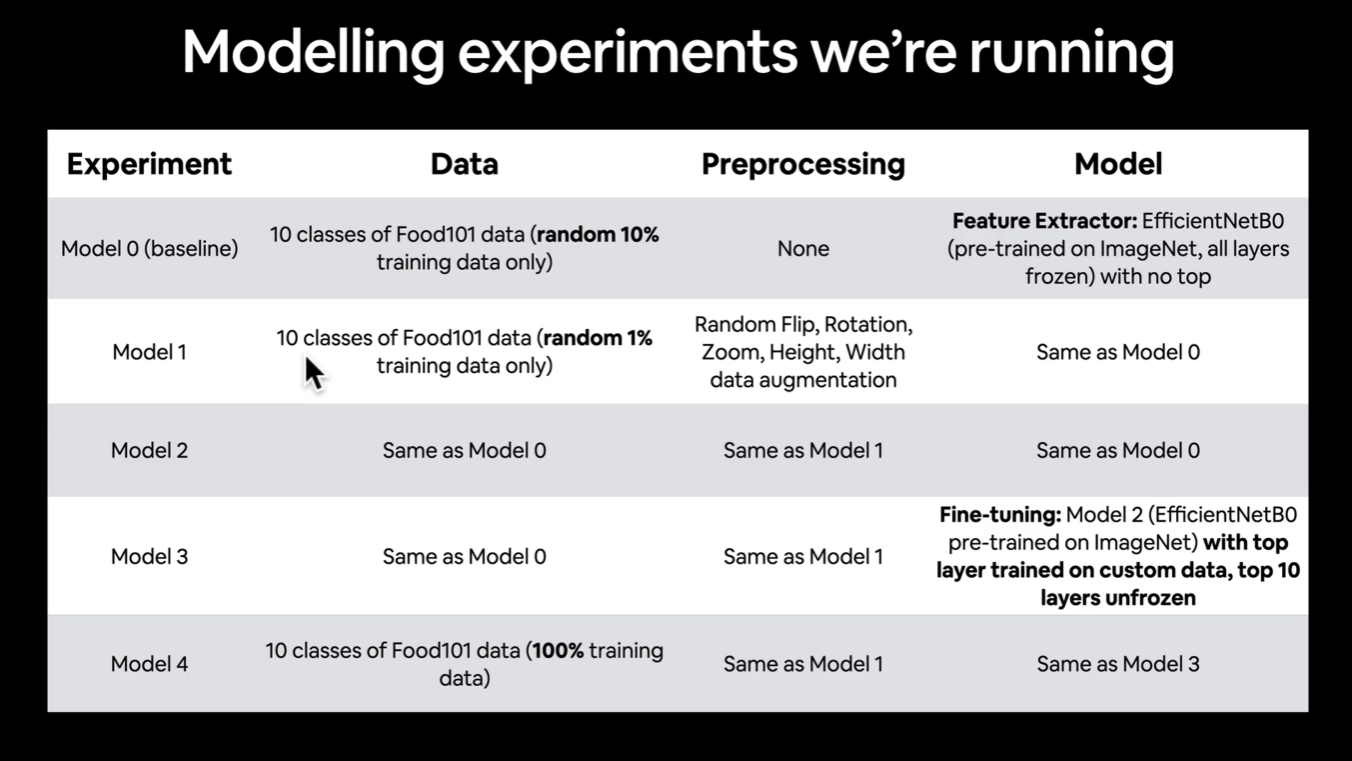

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
import pathlib
import numpy as np
import random
import datetime

We are going to use pretrained models from tf.keras.applications and apply them to our own problem https://www.tensorflow.org/api_docs/python/tf/keras/applications


In [ ]:
#Use same food data but just 10 percent
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-25 08:10:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   184MB/s    in 0.9s    

2023-12-25 08:10:35 (184 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# !wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py"

--2023-12-25 08:31:32--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54275 (53K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  53.00K  --.-KB/s    in 0.05s   

2023-12-25 08:31:32 (1.07 MB/s) - ‘helper_functions.py’ saved [54275/54275]



In [ ]:
#Get the data
#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent/train.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza.
There are

In [ ]:
#Create train and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [ ]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

#Get data using image_dataset_from_directory
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=train_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.


In [ ]:
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=test_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

#Checkout class names
print(train_data_10_percent.class_names)

Found 2500 files belonging to 10 classes.
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
#Check one batch
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.51000000e+02 1.52000000e+02 1.56000000e+02]
   [1.51596939e+02 1.52596939e+02 1.56596939e+02]
   [1.51719391e+02 1.52719391e+02 1.56719391e+02]
   ...
   [1.43960007e+02 1.73801865e+02 1.25521248e+02]
   [1.27902878e+02 1.62117203e+02 1.11045761e+02]
   [1.05974419e+02 1.44974411e+02 8.99744186e+01]]

  [[1.49928574e+02 1.50928574e+02 1.54928574e+02]
   [1.49994904e+02 1.50994904e+02 1.54994904e+02]
   [1.50928574e+02 1.51928574e+02 1.55928574e+02]
   ...
   [1.74505493e+02 2.05862701e+02 1.56291229e+02]
   [1.13684517e+02 1.47898849e+02 9.68171921e+01]
   [1.29642166e+02 1.68550323e+02 1.13596245e+02]]

  [[1.49000000e+02 1.50000000e+02 1.54000000e+02]
   [1.49198975e+02 1.50198975e+02 1.54198975e+02]
   [1.50000000e+02 1.51000000e+02 1.55000000e+02]
   ...
   [1.26102554e+02 1.57628113e+02 1.07719940e+02]
   [1.58250473e+02 1.93082123e+02 1.39679047e+02]
   [1.33575104e+02 1.69998672e+02 1.15080215e+02]]

  ...

  [[9.50714493e+01 9.50714493e+01 9.30714493e+01]
   [9

###Create model using functional API

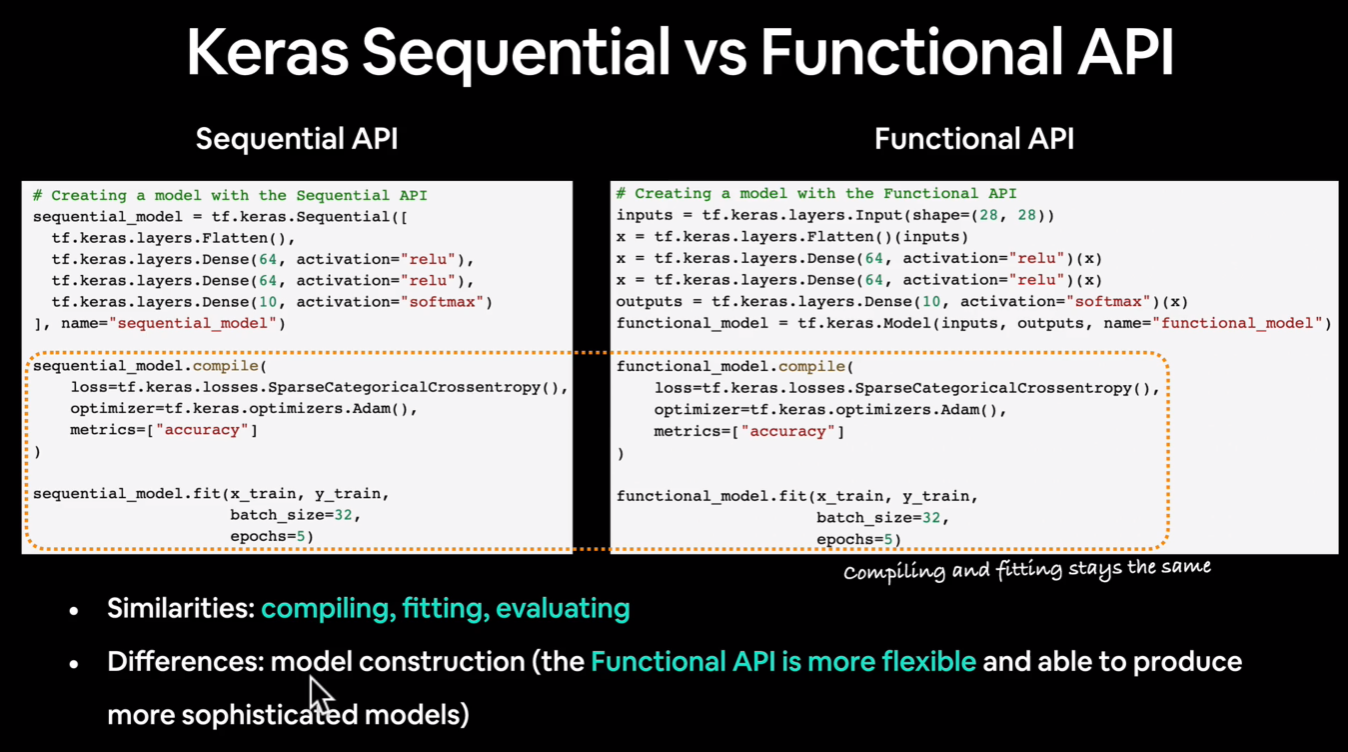

###Create a baseline model using functional api

The sequential API is straight-forward, it runs our layers in sequential order. But the functional API gives us more flexibility with our models.

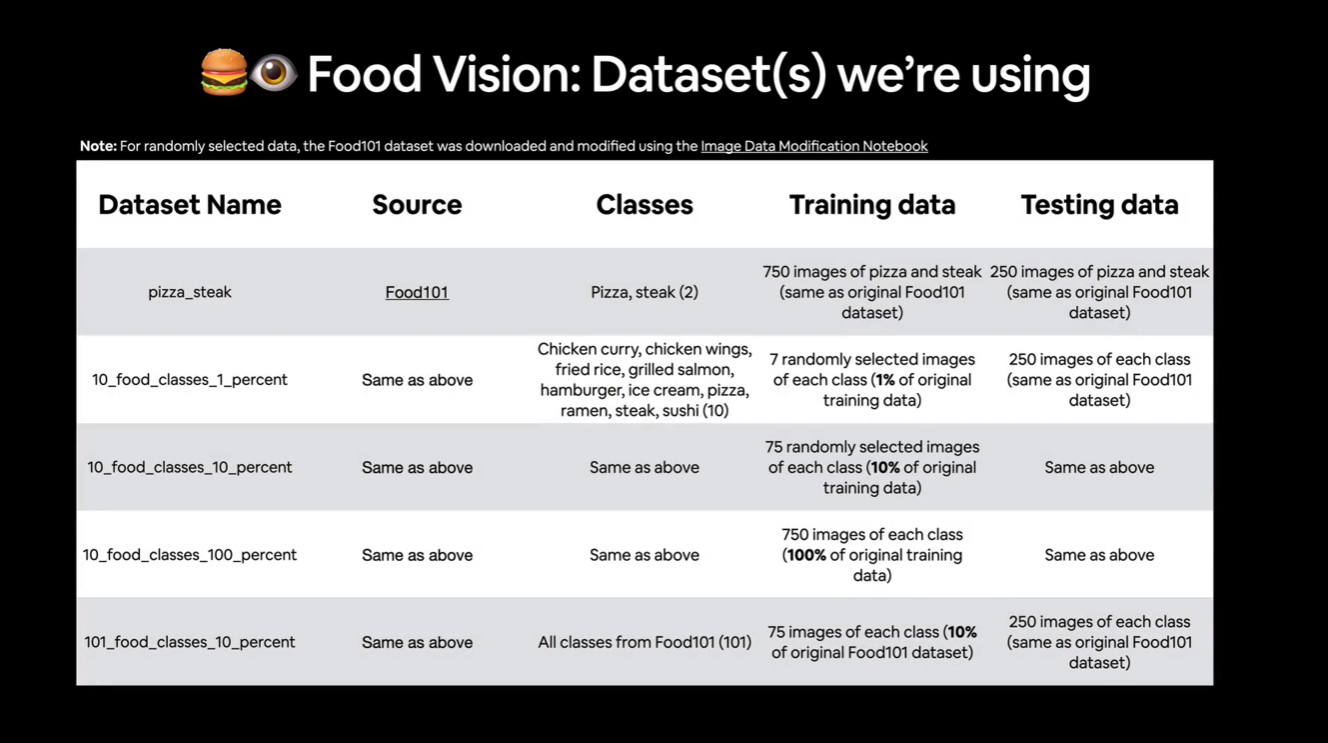

In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir=dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
#1.Create base transfer learning feature extraction model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#2.Freeze the base model (so the underlying pre-trained patterns are not updated)
base_model.trainable=False
#3.Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
#4.If using Resnetv250 model we will need to normalize inputs, no need to normalize for Efficientnet model
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
#5.Pass the inputs to base model
x=base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
#6.Average pool the outputs of the base model
x=tf.keras.layers.GlobalAvgPool2D(name="global_avg_pooling_layer")(x)
print(f"Shape after Global Average Pooling 2D: {x.shape}")
#7.Create the output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_0=tf.keras.Model(inputs,outputs)
#8.Compile the mode
model_0.compile(
  loss=tf.keras.losses.categorical_crossentropy,
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"])
#9.Fit the model

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=len(test_data_10_percent),
                        callbacks=create_tensorboard_callback(dir_name="transfer_learning",
                                                              experiment_name="fine_tuning_base_model_0"))

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after Global Average Pooling 2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/fine_tuning_base_model_0/20231225-083401
Epoch 1/5
24/24 [==============================] - 26s 600ms/step - loss: 1.8748 - accuracy: 0.4173 - val_loss: 1.3093 - val_accuracy: 0.7532
Epoch 2/5
24/24 [==============================] - 8s 333ms/step - loss: 1.1443 - accuracy: 0.7480 - val_loss: 0.8946 - val_accuracy: 0.8168
Epoch 3/5
24/24 [==============================] - 7s 282ms/step - loss: 0.8553 - accuracy: 0.8133 - val_loss: 0.7196 - val_accuracy: 0.8388
Epoch 4/5
24/24 [==============================] - 7s 263ms/step - loss: 0.6966 - accuracy: 0.8440 - val_loss: 0.6272 - val_accuracy: 0.8524
Epoch 5/5
24/24 [==============================] - 7s 262ms/step - loss: 0.6003 - accuracy: 0.8600 - val_loss: 0.5704 - val_accuracy: 0.8600


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training any validation metrics.
  """

  loss= history.history["loss"]
  val_loss= history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]
  epochs =range(len(history.history["loss"]))

  #Plot the loss
  plt.figure()
  plt.plot(epochs,loss,  label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  #Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy,  label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


79/79 [==============================] - 9s 91ms/step - loss: 0.5704 - accuracy: 0.8600
Base model evaluation  [0.5704065561294556, 0.8600000143051147]


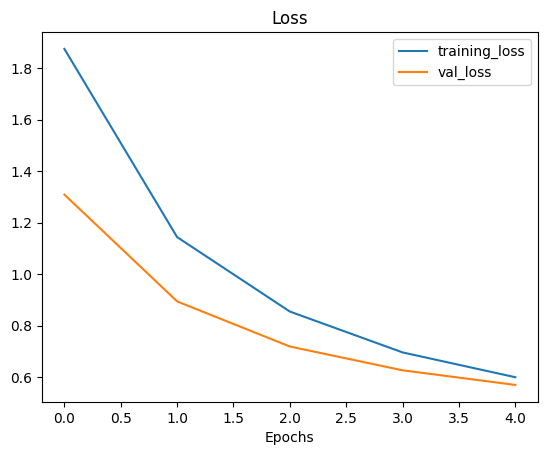

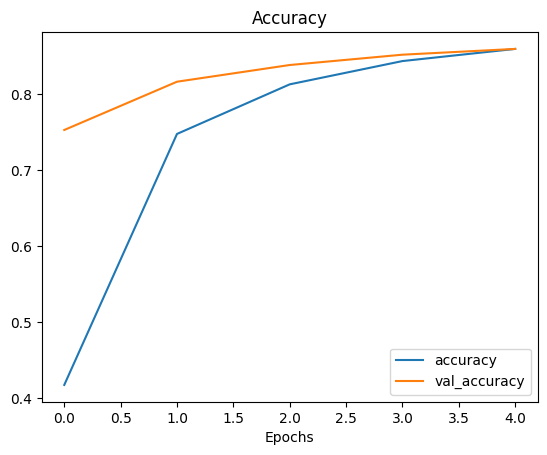

In [ ]:
print("Base model evaluation ", model_0.evaluate(test_data_10_percent))
plot_loss_curves(history_0)

In [ ]:
#Check layers in our base model
# for layer_number, layer in enumerate(base_model.layers):
#     print(layer_number, layer.name)

#Check the summary of EfficientNetV2B0
# print(base_model.summary())

###Get the feature vector

We have a tensor after our model goes through `base_model` of shape (None, 7,7,1280). When it passes through GlobalAveragePooling2D, it turns into (None, 1280).
Let's use a similar shaped tensor (1,4,4,3) and the pass it to GlobalAveragePooling2D.


In [ ]:
#Create a random tensor
input_shape=(1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"Random input tensor: {input_tensor}")
#Pass the random tensor through GlobalAveragePooling2D
global_avg_pooled_tensor = tf.keras.layers.GlobalAvgPool2D()(input_tensor)
print(f"2D global avg pooled random tensor: {global_avg_pooled_tensor}")

#GlobalAvgPool2D() converts a tensor into a feature vector by condensing the middle dimensions
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of the global avg pooled 2D tensor: {global_avg_pooled_tensor}")

#Let's replicate the GlobalAveragePooling2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

max_pooled_tensor = tf.keras.layers.MaxPool2D()(input_tensor)
print(f"Max Pooled random tensor {max_pooled_tensor}")
print(f"Shape of the max pooled tensor: {max_pooled_tensor.shape}")


Random input tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
2D global avg pooled random tensor: [[-0.09368646 -0.45840448 -0.2885598 ]]
Shape of input tensor: (1, 4, 4, 3)
Shape of the global avg pooled 2D tensor: [[-0.09368646 -0.45840448 -0.2885598 ]]
Max Pooled random tensor [[[[ 0.8504023  -0.40604794  0.3194337 ]
   [ 0.9058464   0.539707    1.6994323 ]]

  [[ 0.7785

One of the reasons feature extraction transfer learning is names how it is is because what often happens is pretrained model outputs
feature vector (a long tensor of numbers which represents the learned representation of the model on a particular sample, in our case,
this is the output of the GlobalAveragePooling2D() layer which can then be used to extract patterns out of our own specific problem.

In [ ]:
#Create a model using feature extraction transfer learning with 1% of the training data with data augmentation
#Get food data but just 1 percent
# !wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"

#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-25 08:39:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.207, 74.125.124.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   190MB/s    in 0.7s    

2023-12-25 08:39:39 (190 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
#Create data directories
train_1_percent_dir = "10_food_classes_1_percent/train/"
test_1_percent_dir = "10_food_classes_1_percent/test/"

In [ ]:
#Load data
train_1_percent_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_1_percent_dir,
                                                                           label_mode='categorical',
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_1_percent_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_1_percent_dir,
                                                                          label_mode='categorical',
                                                                          image_size=IMAGE_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


To add data augmentation right into the mode, we can use the layers inside:
tf.keras.layers.experimental.preprocessing()

In [ ]:
#Add data augmentation right into the model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1/255.),
], name="data_augmentation")

There are two important points to be aware when using data augmentation as a layer in our model:
- Data augmentation will run on-devide, synchronously with the rest of your layers, and beenfit from GPU acceleration.
- When you export your model using model.save, the preprocessing layers will be saved along with the rest of your model.
  If you later deploy this model, it will automatically standardize images (according to the configuration of your layers).
  This can save you from the effort of having to reimplement that logic server-side.

10_food_classes_1_percent/train/hamburger


Text(0.5, 1.0, 'Augmented image from random class hamburger')

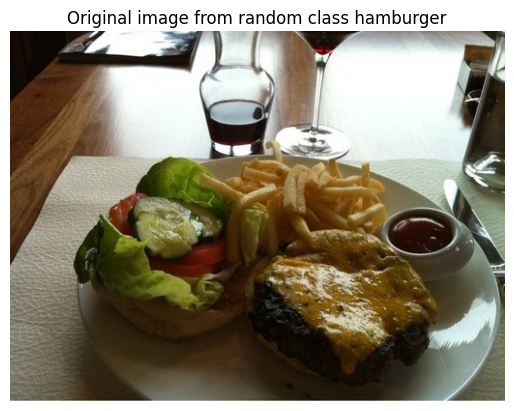

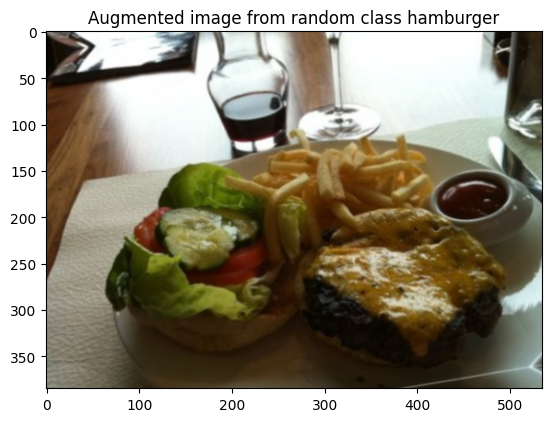

In [ ]:
#Visualize our data augmentation layer
#View a random image
target_class = random.choice(train_1_percent_data.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
print(target_dir)
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original image from random class {target_class}")
plt.axis(False)
#Let's visualize augmented image
plt.figure()
augmented_img = data_augmentation(img, training=True)
plt.imshow(augmented_img/255.)
plt.title(f"Augmented image from random class {target_class}")

In [ ]:
#Create a model with feature extraction transfer learning with data augmentation on 1 percent data
input_shape = (224,224,3)
#Setup base model and freeze the learning
base_model= tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
#Create the input layer
inputs = layers.Input(shape=input_shape, name="input_layer")
#Add augmentation layer
x = data_augmentation(inputs)
#Give base_model the inputs
x = base_model(x, training=False)
#Pool the output features
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
#Put an output layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
#Define the model_1
model_1=keras.Model(inputs, outputs)
#Compile the model
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit the model
history_1 = model_1.fit(train_1_percent_data,
                        epochs=5,
                        steps_per_epoch=len(train_1_percent_data),
                        validation_data=test_1_percent_data,
                        validation_steps=len(test_1_percent_data),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="fine_tuning_model_1")])

Saving TensorBoard log files to: transfer_learning/fine_tuning_model_1/20231225-084212
Epoch 1/5
3/3 [==============================] - 25s 7s/step - loss: 2.3603 - accuracy: 0.1143 - val_loss: 2.1676 - val_accuracy: 0.2372
Epoch 2/5
3/3 [==============================] - 10s 4s/step - loss: 2.0817 - accuracy: 0.3143 - val_loss: 2.0510 - val_accuracy: 0.3128
Epoch 3/5
3/3 [==============================] - 8s 3s/step - loss: 1.9660 - accuracy: 0.3857 - val_loss: 1.9506 - val_accuracy: 0.3720
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.8059 - accuracy: 0.5143 - val_loss: 1.8578 - val_accuracy: 0.4328
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.6464 - accuracy: 0.6000 - val_loss: 1.7771 - val_accuracy: 0.4848


In [ ]:
#Evaluate the model
print("Model 1 evaluation ", model_1.evaluate(test_1_percent_data))

79/79 [==============================] - 5s 61ms/step - loss: 1.7771 - accuracy: 0.4848
Model 1 evaluation  [1.7770699262619019, 0.4848000109195709]


In [ ]:
#Create train and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

#Get data using image_dataset_from_directory
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=train_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=test_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

#Add data augmentation right into the model
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1/255.),
], name="data_augmentation")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###Create Model checkpoint callback

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during the training.
This is useful so we can come and start where we left off.

In [ ]:
#Save weights of the model only
checkpoint_path = "ten_percent_model_weights/checkpoint.ckpt"
def create_model_checkpoint_callback(filepath):
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                       save_weights_only=True,
                                       save_best_only=False,
                                       save_freq="epoch",
                                       verbose=1)
    return checkpoint_callback

In [ ]:
#Create a model with feature extraction transfer learning with data augmentation on 10 percent data
input_shape = (224,224,3)
#Setup base model and freeze the learning
base_model= tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
#Create the input layer
inputs = layers.Input(shape=input_shape, name="input_layer")
#Add augmentation layer
x = data_augmentation(inputs)
#Give base_model the inputs
x = base_model(x, training=False)
#Pool the output features
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
#Put an output layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
#Define the model_1
model_2=keras.Model(inputs, outputs)
#Compile the model
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit the model
history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=len(test_data_10_percent),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="fine_tuning_model_2"),
                                   create_model_checkpoint_callback(checkpoint_path)])

Saving TensorBoard log files to: transfer_learning/fine_tuning_model_2/20231225-084431
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0390 - accuracy: 0.3120
Epoch 1: saving model to ten_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 48s 2s/step - loss: 2.0390 - accuracy: 0.3120 - val_loss: 1.5032 - val_accuracy: 0.6644
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4120 - accuracy: 0.6453
Epoch 2: saving model to ten_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 31s 1s/step - loss: 1.4120 - accuracy: 0.6453 - val_loss: 1.0863 - val_accuracy: 0.7504
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1128 - accuracy: 0.7360
Epoch 3: saving model to ten_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 34s 1s/step - loss: 1.1128 - accuracy: 0.7360 - val_loss: 0.8542 - val_accuracy: 0.7984
Epoch 4/5
24/24 [=============================

In [ ]:
#Evaluate the model
print("Model 2 evaluation ", model_2.evaluate(test_data_10_percent))

79/79 [==============================] - 7s 79ms/step - loss: 0.6698 - accuracy: 0.8320
Model 2 evaluation  [0.6697621941566467, 0.8320000171661377]


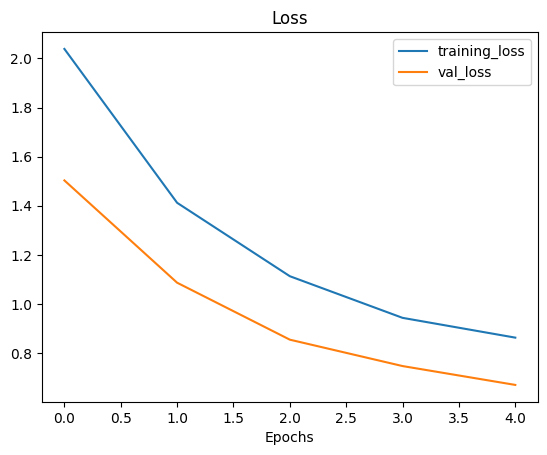

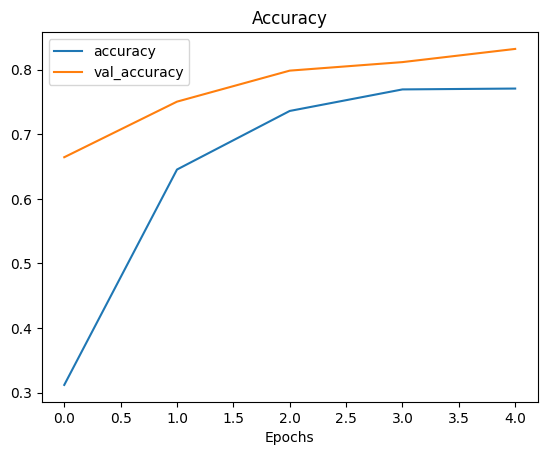

In [ ]:
#Plot the loss curves
plot_loss_curves(history_2)

Loading in checkpointed weights returns a model to a specific checkpoint.

In [ ]:
#Load in saved model weights and evaluate the model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data_10_percent)
print(loaded_weights_model_results)

79/79 [==============================] - 5s 58ms/step - loss: 0.6698 - accuracy: 0.8320
[0.669762134552002, 0.8320000171661377]


In [ ]:
#Create train and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

#Get data using image_dataset_from_directory
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=train_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory=test_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Fine-tuning usually works best after training the feature extraction model for a few epochs with large amounts of custom data.

In [ ]:
#Check layers in loaded model
print(model_2.layers)
#Check whether layers are trainable
for layer in model_2.layers:
    print(layer, layer.trainable)
#How many trainable variables on our base model
print("Trainable variables: ", len(model_2.layers[2].trainable_variables))

[<keras.src.engine.input_layer.InputLayer object at 0x7a03ca5c2f80>, <keras.src.engine.sequential.Sequential object at 0x7a03b64f6320>, <keras.src.engine.functional.Functional object at 0x7a03b979e920>, <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a03ca5c2020>, <keras.src.layers.core.dense.Dense object at 0x7a03b96853c0>]
<keras.src.engine.input_layer.InputLayer object at 0x7a03ca5c2f80> True
<keras.src.engine.sequential.Sequential object at 0x7a03b64f6320> True
<keras.src.engine.functional.Functional object at 0x7a03b979e920> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a03ca5c2020> True
<keras.src.layers.core.dense.Dense object at 0x7a03b96853c0> True
Trainable variables:  0


In [ ]:
#1.Create base transfer learning feature extraction model with tf.keras.applications
# base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#Make top 10 layers trainable
base_model.trainable=True
for layer in base_model.layers[:-10]:
    layer.trainable=False

General rule of thumb for fine-tuning is to lower learning_rate by 10x because our model has already learned weights.
We do not want to update those weights too much, otherwise it may result in overfitting.
Learning rate dictates how much the model should update its internal patterns/weights.
Chekout ULM Fit paper

In [ ]:
#Recompile the model
model_2.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"]
)

In [ ]:
print("Trainable variables: ", len(model_2.layers[2].trainable_variables))

Trainable variables:  10


In [ ]:
#Fit the model
history_2_trainable = model_2.fit(test_data_10_percent,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=int(0.25*len(test_data_10_percent)),
                                  initial_epoch=history_2.epoch[-1], #start training from previous last epoch
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                         experiment_name="fine_tuning_model_2_trainable")])

Saving TensorBoard log files to: transfer_learning/fine_tuning_model_2_trainable/20231225-084825
Epoch 5/10
24/24 [==============================] - 35s 963ms/step - loss: 0.7410 - accuracy: 0.7852 - val_loss: 0.4674 - val_accuracy: 0.8470
Epoch 6/10
24/24 [==============================] - 18s 770ms/step - loss: 0.6362 - accuracy: 0.7930 - val_loss: 0.4078 - val_accuracy: 0.8651
Epoch 7/10
24/24 [==============================] - 14s 561ms/step - loss: 0.6116 - accuracy: 0.8034 - val_loss: 0.3809 - val_accuracy: 0.8766
Epoch 8/10
 7/24 [=======>......................] - ETA: 13s - loss: 0.6904 - accuracy: 0.7449

24/24 [==============================] - 8s 327ms/step - loss: 0.6904 - accuracy: 0.7449 - val_loss: 0.4004 - val_accuracy: 0.8569


In [ ]:
#Evaluate the model
print("Evaluate Model 2 trainable ", model_2.evaluate(test_data_10_percent))

79/79 [==============================] - 5s 58ms/step - loss: 0.4245 - accuracy: 0.8600
Evaluate Model 2 trainable  [0.4245252311229706, 0.8600000143051147]


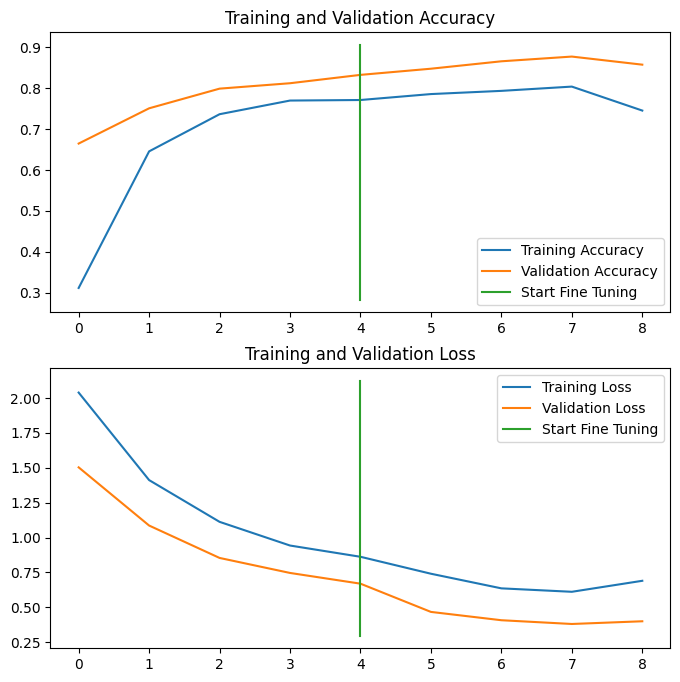

In [ ]:
def compare_histories(original_history,new_history, initial_epochs=5):
    """
    Compares two tensorflow history objects
    """
    #Get original_history metrics
    acc=original_history.history["accuracy"]
    loss=original_history.history["loss"]
    val_acc=original_history.history["val_accuracy"]
    val_loss=original_history.history["val_loss"]
    #Combine original hisotry metrics with new_history metrics
    total_acc=acc+new_history.history["accuracy"]
    total_loss=loss+new_history.history["loss"]
    total_val_acc=val_acc+new_history.history["val_accuracy"]
    total_val_loss=val_loss+new_history.history["val_loss"]
    #Plot accuracy
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc, label="Training Accuracy")
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc='lower right')
    plt.title("Training and Validation Accuracy")

    # Plot loss
    #plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label="Training Loss")
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc='upper right')
    plt.title("Training and Validation Loss")

compare_histories(history_2, history_2_trainable, initial_epochs=5)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-25 08:53:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 64.233.191.207, 173.194.74.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   198MB/s    in 2.5s    

2023-12-25 08:53:07 (198 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
#Create train and test directory paths
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

#Get data using image_dataset_from_directory
train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(
  directory=train_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

test_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(
  directory=test_dir, image_size=IMAGE_SIZE, label_mode="categorical", batch_size=BATCH_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#To train a fine tuning model we need to revert it back to its feature extraction weight
# model_2.load_weights(checkpoint_path)
print("Evaluate model with reverted weights ", model_2.evaluate(test_data_all_data))
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)


79/79 [==============================] - 5s 57ms/step - loss: 0.6698 - accuracy: 0.8320
Evaluate model with reverted weights  [0.6697622537612915, 0.8320000171661377]


In [ ]:
history_4 = model_2.fit(train_data_all_data,
                        epochs=10,
                        steps_per_epoch=len(train_data_all_data),
                        validation_data=test_data_all_data,
                        validation_steps=int(0.25*len(test_data_all_data)),
                        initial_epoch=history_2.epoch[-1], #start training from previous last epoch
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="fine_tuning_model_4")])

Saving TensorBoard log files to: transfer_learning/fine_tuning_model_4/20231225-085506
Epoch 5/10
235/235 [==============================] - 133s 527ms/step - loss: 0.7204 - accuracy: 0.7729 - val_loss: 0.3687 - val_accuracy: 0.8816
Epoch 6/10
235/235 [==============================] - 100s 424ms/step - loss: 0.6058 - accuracy: 0.8043 - val_loss: 0.3349 - val_accuracy: 0.8799
Epoch 7/10
235/235 [==============================] - 88s 374ms/step - loss: 0.5385 - accuracy: 0.8269 - val_loss: 0.2744 - val_accuracy: 0.9161
Epoch 8/10
235/235 [==============================] - 81s 342ms/step - loss: 0.5173 - accuracy: 0.8311 - val_loss: 0.2760 - val_accuracy: 0.9062
Epoch 9/10
235/235 [==============================] - 64s 269ms/step - loss: 0.4768 - accuracy: 0.8471 - val_loss: 0.2436 - val_accuracy: 0.9243
Epoch 10/10
235/235 [==============================] - 62s 262ms/step - loss: 0.4616 - accuracy: 0.8497 - val_loss: 0.2788 - val_accuracy: 0.9112


In [ ]:
#Evaluate the model
print("Evaluate Model 4 ", model_2.evaluate(test_data_all_data))

79/79 [==============================] - 5s 59ms/step - loss: 0.2918 - accuracy: 0.9028
Evaluate Model 4  [0.2917994558811188, 0.9028000235557556]


In [ ]:
#Check trainable layers in model_4
# for layer_number, layer in enumerate(model_2.layers):
#     print(layer_number, layer.name, layer.trainable)
#
# for layer_number in enumerate(model_2.layers[2].layers):
#     print(layer_number, layer.name, layer.trainable)

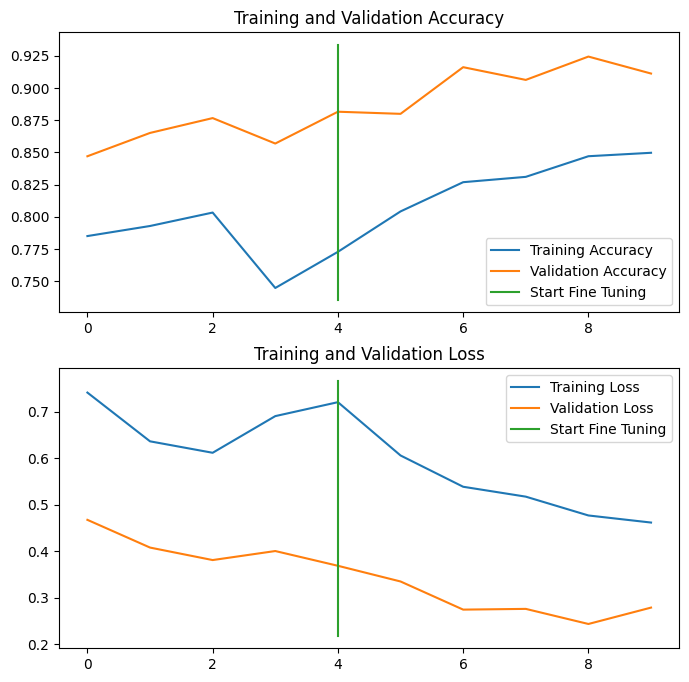

In [ ]:
compare_histories(history_2_trainable, history_4, initial_epochs=5)